In [11]:
import torch

In [3]:
import teacher_student

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
input_dim = 500
output_dim = 1

test_bs = 50

teacher_layers = [1]
student_layers = [2]

curriculum = [(0, 10000)]

lr = 0.2

nonlinearity = 'relu'

In [6]:
ts = teacher_student.StudentTeacher(num_teachers=1, input_dimension=input_dim, output_dimension=output_dim, curriculum=curriculum, learning_rate=lr, teacher_hidden=teacher_layers, student_hidden=student_layers, nonlinearity=nonlinearity, add_teacher_noise=False, soft_committee=False, test_batch_size=test_bs)

/Users/sebastianlee/Envs/meta/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


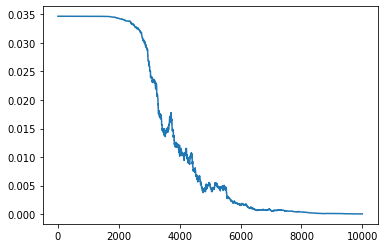

In [10]:
log_ = False

fig = plt.figure()
if log_:
    plt.plot(np.log(range(len(losses[0]))), np.log(losses[0]))
else:
    plt.plot((range(len(losses[1]))), (losses[1]))
fig.show()

In [17]:
np.random.randn(10, 10)

array([[ 1.80071902, -0.30910827, -2.38488414, -0.72247322,  0.55506519,
        -0.51238486, -1.5662421 , -1.10439205,  0.09899087,  0.90854895],
       [-1.48702477,  0.23196733, -0.7703389 , -1.6847878 , -1.72564435,
        -0.04010959,  1.55932225,  0.10621151, -0.77450428, -1.46761401],
       [-1.06810788, -0.28599997,  0.42155139,  1.36628452, -0.50241618,
         0.34859526,  1.21387363, -1.97463001, -0.40937141, -1.67940081],
       [-2.76884215,  2.14879066, -0.6419074 , -0.39862003, -0.12948224,
        -0.54254145,  0.49167443, -0.10182471,  1.50932676, -0.46898803],
       [-0.09239967,  0.91455982, -1.3892715 , -1.0911678 ,  0.23586441,
        -0.47975663, -0.34938954, -1.04301946,  1.10107487,  0.76526754],
       [-0.96786137,  0.73789413, -0.06083744,  0.58827293, -0.66258471,
        -0.70118437,  0.16121239, -1.62661507,  0.09001663, -0.03599903],
       [-0.42482112, -1.10839954,  0.82286493, -0.4904409 , -0.5101442 ,
        -0.86394906,  0.48174786, -0.38125206

In [38]:
rand_test = torch.randn(10000)

In [40]:
rand_np = rand_test.numpy()
print(np.mean(rand_np))
print(np.std(rand_np))

-0.00053665467
1.0021944


/Users/sebastianlee/Envs/meta/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


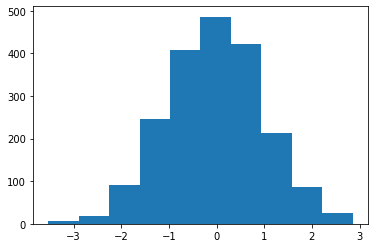

In [35]:
fig = plt.figure()
plt.hist(rand_np)
fig.show()

In [1]:
import torch
import utils.parameters
import yaml
import numpy as np
import matplotlib.pyplot as plt

In [2]:
CONFIG_PATH = "experiments/base_config.yaml"

In [3]:
from models import Teacher

In [4]:
# read base-parameters from base-config
with open(CONFIG_PATH, 'r') as yaml_file:
    params = yaml.load(yaml_file, yaml.SafeLoader)

# create object in which to store experiment parameters
student_teacher_parameters = utils.parameters.StudentTeacherParameters(params)

In [36]:
def get_output_range(repeats, nl, plot=True, trim_zeros=False):
    student_teacher_parameters._config["model"]["nonlinearity"] = nl
    sample_teacher = Teacher(student_teacher_parameters)
    sample_teacher.freeze_weights()
    outputs = []
#     return sample_teacher(torch.randn(5000, 500))
    for r in range(repeats):
        x = torch.randn(500)
        teacher_output = sample_teacher(x)
        outputs.append(float(teacher_output))
    if plot:
        fig = plt.figure()
        if trim_zeros:
            plt.hist([o for o in outputs if o != 0], bins=50)
        else:
            plt.hist(outputs, bins=50)
        fig.show()
    print(min(outputs), max(outputs), np.std(outputs), outputs.count(0))
    return outputs

/Users/sebastianlee/Envs/meta/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


0.015033246017992496 0.5673972964286804 0.12186552560672052 0


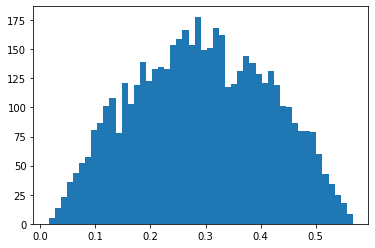

In [38]:
outs = get_output_range(5000, "sigmoid")

In [32]:
float(max(outs))

2.610724687576294